In [6]:
import pandas as pd
import matplotlib.pyplot as plt
# Evitar ficar usando plt.show()
%matplotlib inline
from functools import reduce # Inner join mais de 1 base de dados
import matplotlib.dates as mdates # Arrumar as datas no eixo

In [3]:
df_teste = pd.read_csv('https://raw.githubusercontent.com/FlavioMacaubas/covid_19_paraiba/master/base_dados.csv')

In [9]:
campina_grande = df_teste.loc[df_teste['cidade'] == 'Campina Grande']
campina_grande.head()

,data,cidade,confirmados,obitos,recuperados,novos_casos,novos_obitos
1,2020-03-31,Campina Grande,2,0,0,0,0
7,2020-04-01,Campina Grande,2,0,0,0,0
14,2020-04-02,Campina Grande,2,0,0,0,0
21,2020-04-03,Campina Grande,2,0,0,0,0
28,2020-04-04,Campina Grande,2,0,0,0,0


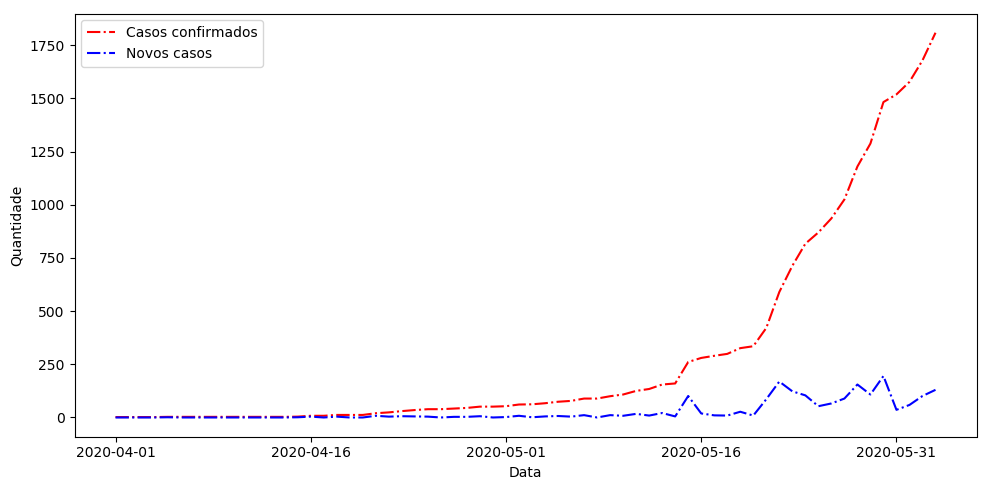

In [39]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots(dpi = 100)
ax.plot(campina_grande['data'], campina_grande['confirmados'], 'r-.', label = 'Casos confirmados')
ax.plot(campina_grande['data'],campina_grande['novos_casos'], 'b-.', label = 'Novos casos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('confirmados_cg.png')

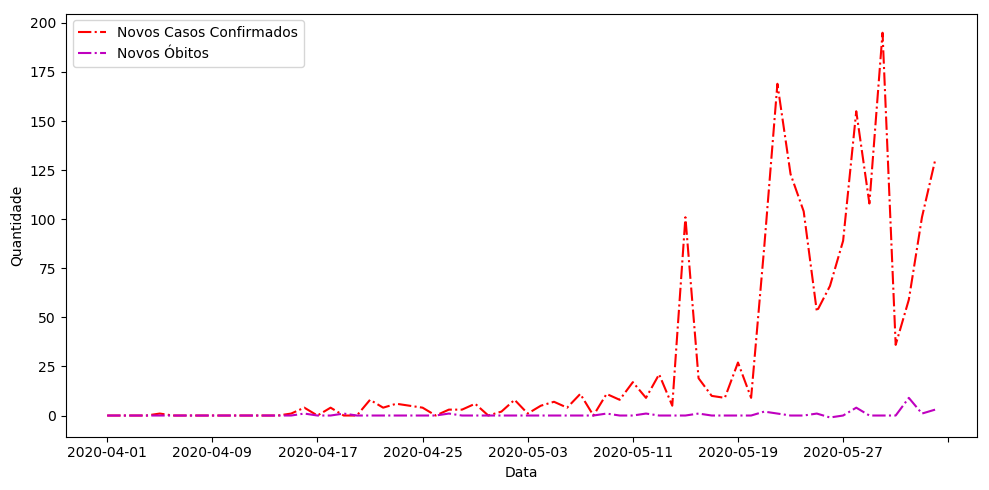

In [12]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(campina_grande['data']))
fig, ax = plt.subplots(dpi = 100)
ax.plot(campina_grande['data'], campina_grande['novos_casos'], 'r-.', label = 'Novos Casos Confirmados')
ax.plot(campina_grande['data'],campina_grande['novos_obitos'], 'm-.', label = 'Novos Óbitos') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Quantidade') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(10)) # Define quantidad de label
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'upper left')
plt.savefig('novos_cg.png')

# Análise Regiões Metropolitanas

## Zona metropolitana de João Pessoa

In [18]:
df_teste = df_teste[['data','cidade','confirmados']]
pb = df_teste.loc[(df_teste['cidade'] == 'Paraíba')]

In [19]:
jp = df_teste.loc[(df_teste['cidade'] == 'João Pessoa')]
conde = df_teste.loc[((df_teste['cidade'] == 'Conde') )]
bayeux = df_teste.loc[(df_teste['cidade'] == 'Bayeux')]
lucena = df_teste.loc[(df_teste['cidade'] == 'Lucena')]
sr = df_teste.loc[(df_teste['cidade'] == 'Santa Rita')]
alhandra = df_teste.loc[(df_teste['cidade'] == 'Alhandra')]
rio_tinto = df_teste.loc[(df_teste['cidade'] == 'Rio Tinto')]
cruz_es = df_teste.loc[(df_teste['cidade'] == 'Cruz do Espírito Santo')]
pedras_de_fogo = df_teste.loc[(df_teste['cidade'] == 'Pedras de Fogo')]
caapora = df_teste.loc[ (df_teste['cidade'] == 'Caaporã')]
pitimbu = df_teste.loc[(df_teste['cidade'] == 'Pitimbu')]
cabedelo = df_teste.loc[(df_teste['cidade'] == 'Cabedelo')]

In [20]:
dfs = [jp,conde,bayeux,lucena,sr,alhandra,rio_tinto,cruz_es,pedras_de_fogo,caapora,pitimbu, cabedelo, pb]

zm_jp = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_jp.columns = ['data','cidade','c_jp','cidade','c_conde','cidade','c_b','cidade','c_lucena', 'cidade','c_sr',
                 'cidade','c_alhandra','cidade','c_rt', 'cidade','c_ces','cidade','c_pf','cidade','c_caa','cidade','c_pit', 'cidade','c_cabedelo', 'cidade','c_pb']

del zm_jp['cidade']

zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493


In [21]:
zm_jp['total_zona'] =  zm_jp.sum(axis=1) - zm_jp['c_pb']

In [22]:
zm_jp.head()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona
0,2020-05-01,614,16,39,4,96,4,4,3,6,3,1,29,1034,819
1,2020-05-02,701,17,41,5,100,7,4,4,9,3,1,39,1169,931
2,2020-05-03,711,17,43,5,111,7,4,4,9,3,2,39,1219,955
3,2020-05-04,802,17,44,5,122,8,4,6,10,4,2,44,1361,1068
4,2020-05-05,865,18,45,6,129,8,5,7,15,5,2,51,1493,1156


In [23]:
zm_jp['participacao'] = zm_jp['total_zona']*100/zm_jp['c_pb']
zm_jp.tail()

,data,c_jp,c_conde,c_b,c_lucena,c_sr,c_alhandra,c_rt,c_ces,c_pf,c_caa,c_pit,c_cabedelo,c_pb,total_zona,participacao
29,2020-05-30,3902,95,304,54,569,135,55,100,245,337,67,731,12862,6594,51.267299
30,2020-05-31,3959,95,307,54,583,138,56,103,245,353,68,750,13162,6711,50.987692
31,2020-06-01,4151,97,319,54,597,138,57,110,247,371,100,796,13695,7037,51.383717
32,2020-06-02,4467,102,346,59,632,144,57,112,279,392,119,860,14859,7569,50.938825
33,2020-06-03,4820,108,374,85,659,158,78,114,292,405,126,893,16018,8112,50.643027


## Zona Metropolitana de Campina Grande

In [24]:
cg = df_teste.loc[(df_teste['cidade'] == 'Campina Grande')]
puxinana = df_teste.loc[((df_teste['cidade'] == 'Puxinanã') )]
lagoa_seca = df_teste.loc[(df_teste['cidade'] == 'Lagoa Seca')]
massaranduba = df_teste.loc[(df_teste['cidade'] == 'Massaranduba')]
serra_redonda = df_teste.loc[(df_teste['cidade'] == 'Serra Redonda')]
itatuba = df_teste.loc[(df_teste['cidade'] == 'Itatuba')]
queimadas = df_teste.loc[(df_teste['cidade'] == 'Queimadas')]
boqueirao = df_teste.loc[(df_teste['cidade'] == 'Boqueirão')]
barra_santana = df_teste.loc[(df_teste['cidade'] == 'Barra de Santana')]
gado_bravo = df_teste.loc[(df_teste['cidade'] == 'Gado Bravo')]
aroeiras = df_teste.loc[(df_teste['cidade'] == 'Aroeiras')]
umbuzeiro = df_teste.loc[(df_teste['cidade'] == 'Umbuzeiro')]


In [25]:
dfs = [cg, puxinana, lagoa_seca, massaranduba,serra_redonda,itatuba,queimadas, boqueirao,barra_santana,gado_bravo,aroeiras, umbuzeiro, pb]

zm_cg = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zm_cg.columns = ['data','cidade','c_cg','cidade','c_pux','cidade','c_ls','cidade','c_massa', 'cidade','c_sr',
                 'cidade','c_ita','cidade','c_quei', 'cidade','c_boq','cidade','c_bs','cidade','c_gb','cidade','c_a', 'cidade','c_umbu', 'cidade','c_pb']

del zm_cg['cidade']

zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063


In [26]:
zm_cg["total_zona"] = zm_cg.sum(axis=1) - zm_cg['c_pb']
zm_cg.head()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona
0,2020-05-12,134,1,8,4,2,2,6,2,2,2,2,4,2777,169
1,2020-05-13,155,1,8,4,2,2,6,2,2,2,5,5,3045,194
2,2020-05-14,160,1,8,4,2,4,6,2,4,2,5,7,3361,205
3,2020-05-15,261,1,8,4,2,4,17,2,4,2,5,7,3739,317
4,2020-05-16,280,1,8,6,2,8,17,2,4,4,5,8,4063,345


In [27]:
zm_cg['participacao'] = zm_cg['total_zona']*100/zm_cg['c_pb']
zm_cg.tail()

,data,c_cg,c_pux,c_ls,c_massa,c_sr,c_ita,c_quei,c_boq,c_bs,c_gb,c_a,c_umbu,c_pb,total_zona,participacao
18,2020-05-30,1483,29,74,22,36,47,94,17,15,23,23,16,12862,1879,14.608926
19,2020-05-31,1519,29,75,22,36,47,94,20,15,23,23,16,13162,1919,14.579851
20,2020-06-01,1578,30,76,22,36,47,94,20,16,23,23,16,13695,1981,14.465133
21,2020-06-02,1679,38,98,30,48,47,97,28,18,23,25,16,14859,2147,14.449155
22,2020-06-03,1809,41,106,32,52,47,100,29,18,34,31,16,16018,2315,14.452491


## Zona Metropolitana Patos

In [28]:
patos = df_teste.loc[(df_teste['cidade'] == 'Patos')]
santa_teresinha = df_teste.loc[(df_teste['cidade'] == 'Santa Teresinha')]
condado = df_teste.loc[(df_teste['cidade'] == 'Condado')]
malta = df_teste.loc[(df_teste['cidade'] == 'Malta')]
santa_luzia = df_teste.loc[(df_teste['cidade'] == 'Santa Luzia')]
sjs = df_teste.loc[(df_teste['cidade'] == 'São José do Sabugi')]
js = df_teste.loc[(df_teste['cidade'] == 'Junco do Seridó')]
teixeira = df_teste.loc[(df_teste['cidade'] == 'Teixeira')]
mat = df_teste.loc[(df_teste['cidade'] == 'Maturéia')]

In [29]:
dfs = [patos, santa_teresinha, condado, malta, santa_luzia, sjs, js, teixeira, mat, pb]

zm_pt = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)


zm_pt.columns = ['data','cidade','c_pt','cidade','c_st','cidade','c_cond','cidade','c_malta', 'cidade','c_sl',
                 'cidade','c_sjs','cidade','c_js', 'cidade','c_tex','cidade','c_mat', 'cidade','c_pb']

del zm_pt['cidade']

zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb
19,2020-05-30,555,13,38,11,43,61,9,17,10,12862
20,2020-05-31,565,13,38,11,47,61,9,17,10,13162
21,2020-06-01,587,13,39,11,47,62,9,17,10,13695
22,2020-06-02,610,16,39,14,56,65,11,17,11,14859
23,2020-06-03,632,16,39,14,61,68,11,18,11,16018


In [30]:
zm_pt["total_zona"] = zm_pt.sum(axis=1) - zm_pt['c_pb']
zm_pt.head()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona
0,2020-05-11,109,1,11,1,1,2,3,1,1,2525,130
1,2020-05-12,128,1,14,1,1,2,3,1,1,2777,152
2,2020-05-13,138,1,14,2,4,2,3,1,1,3045,166
3,2020-05-14,174,1,14,2,4,2,3,1,1,3361,202
4,2020-05-15,219,1,20,4,4,2,3,1,1,3739,255


In [31]:
zm_pt['participacao'] = zm_pt['total_zona']*100/zm_pt['c_pb']
zm_pt.tail()

,data,c_pt,c_st,c_cond,c_malta,c_sl,c_sjs,c_js,c_tex,c_mat,c_pb,total_zona,participacao
19,2020-05-30,555,13,38,11,43,61,9,17,10,12862,757,5.885554
20,2020-05-31,565,13,38,11,47,61,9,17,10,13162,771,5.857772
21,2020-06-01,587,13,39,11,47,62,9,17,10,13695,795,5.805038
22,2020-06-02,610,16,39,14,56,65,11,17,11,14859,839,5.646410
23,2020-06-03,632,16,39,14,61,68,11,18,11,16018,870,5.431390


## Juntando Base de Dados

In [32]:
zm_jp = zm_jp[['data','participacao']]
zm_cg = zm_cg[['data','participacao']]
zm_pt = zm_pt[['data','participacao']]

In [33]:
dfs = [zm_jp,zm_cg,zm_pt]

zonas = reduce(lambda left,right: pd.merge(left,right, how='inner', on='data'), dfs)

zonas.columns = ['data','part_jp','part_cg','part_pt']

zonas.tail()

,data,part_jp,part_cg,part_pt
18,2020-05-30,51.267299,14.608926,5.885554
19,2020-05-31,50.987692,14.579851,5.857772
20,2020-06-01,51.383717,14.465133,5.805038
21,2020-06-02,50.938825,14.449155,5.646410
22,2020-06-03,50.643027,14.452491,5.431390


In [34]:
zm_jp.tail()

,data,participacao
29,2020-05-30,51.267299
30,2020-05-31,50.987692
31,2020-06-01,51.383717
32,2020-06-02,50.938825
33,2020-06-03,50.643027


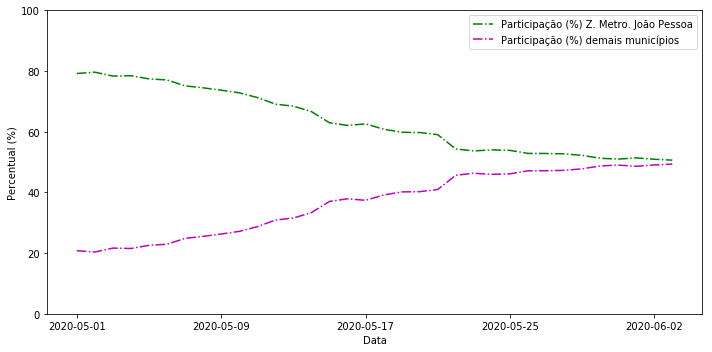

In [35]:
# Mapa confirmados e novos casos
data = mdates.num2date(mdates.datestr2num(paraiba['data']))
fig, ax = plt.subplots()
ax.plot(zm_jp['data'], zm_jp['participacao'], 'g-.', label = 'Participação (%) Z. Metro. João Pessoa')
ax.plot(zm_jp['data'], 100 - zm_jp['participacao'], 'm-.', label = 'Participação (%) demais municípios') 
ax.set_xlabel('Data') # Nome do eixo x
ax.set_ylabel('Percentual (%)') # Nome do eixo y
ax.xaxis.set_major_locator(plt.MaxNLocator(6)) # Define quantidad de label
plt.ylim(0,100)
plt.tight_layout() # Organiza o espaço
plt.rcParams['figure.figsize'] = (10,5)
ax.legend(loc = 'best')
plt.savefig('jp_resto.png')

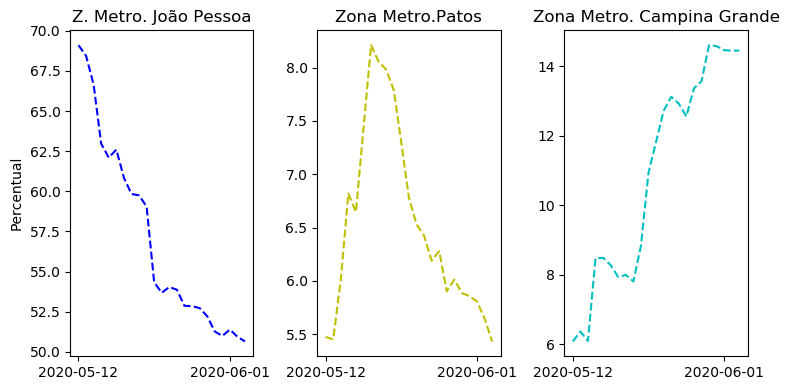

In [46]:
fig, ax = plt.subplots(figsize=(8,4), dpi = 100, nrows=1, ncols=3)

#João Pessoa
ax[0].set_title('Z. Metro. João Pessoa')
ax[0].plot(zonas['data'], zonas['part_jp'], 'b--')
ax[0].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label
ax[0].set_ylabel('Percentual')

# Patos
ax[1].set_title('Zona Metro.Patos')
ax[1].plot(zonas['data'], zonas['part_pt'], 'y--')
ax[1].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label

# CG
ax[2].set_title('Zona Metro. Campina Grande')
ax[2].plot(zonas['data'], zonas['part_cg'], 'c--')



ax[2].xaxis.set_major_locator(plt.MaxNLocator(1)) # Define quantidad de label



plt.tight_layout() # Organiza o espaço

fig.savefig('prop_muni_cg.png')